In [1]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install requests
!pip install requests-oauthlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
consumer_key= "ziyXdLtnfI6NRDMTKeZWaSTm1"
consumer_secret= "UhkQTNxVu2DlM8U10CzIhbeu21Z2NXs4JvtpzPB8K4D0oX5JTP"
bearer="AAAAAAAAAAAAAAAAAAAAAD4imwEAAAAAcuV2d4fRZgqB%2FwOWh4Kk4hPPoRQ%3D8HuPaG7BPm9CXOHEsQZi4Ejm7MVSRv0hBTt5b4LncDjhLTX8Ha"
access_token= "1647318746459930625-gTKGmHNVnzImA0nDLpWMpmq3bwgRW0"
access_token_secret= "TStT9pEsMvm6YhnmkTrsFZPOltrxC4mMMshm0QxBDiqOs"

In [7]:
import tweepy
import re
import time

In [8]:
client = tweepy.Client(bearer, consumer_key,consumer_secret, access_token,access_token_secret)
auth= tweepy.OAuth1UserHandler(consumer_key,consumer_secret, access_token,access_token_secret)
api=tweepy.API(auth)

In [9]:
query = '#Messi'
tweets = tweepy.Cursor(api.search_tweets, q=query,
                              tweet_mode='extended').items(limit=20)

In [10]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=344fed8c7e237c6edd8f240d8a21e7504ab51ab6934db18b9c04ad2355fa5ba5
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans


In [11]:
tweet_list=[]
for tweet in tweets:
  tweet_list.append(tweet.full_text)

print(len(tweet_list))

20


In [12]:
from googletrans import Translator
detector=Translator()
data=[]
for tweet in tweet_list:
  dec_lan = detector.detect(tweet)

  if(dec_lan.lang=='en' and dec_lan.confidence>=0.7):
    data.append(tweet)

In [13]:
print(len(data))

9


In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.porter import PorterStemmer
import re
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


PreProcessing

In [15]:
def pp(text):

  text=re.sub(r'https?:\/\/.*[\r\n]*','', text)
  text=re.sub(r'#','',text)

  tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True, reduce_len=True)
  text= tokenizer.tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  stop_words = set(stopwords.words('english'))
  punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  for i in text:
    if i not in stop_words and i not in punc:
      y.append(i)

  text=y[:]
  y.clear()

  ps=PorterStemmer()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [16]:
import pandas as pd

df=[]

df=pd.DataFrame(data)



In [17]:
print(df)

                                                   0
0  Art is Life🔥. Just completed this\nTitle- Brot...
1  RT @BaaBaaBet: The soccer league schedule is o...
2  RT @agrayphoto: Artist Arlex Campos stands in ...
3  RT @intermiamifc0: Messi getting ready 🔥🔥 #Mes...
4  RT @intermiamifc0: Messi getting ready 🔥🔥 #Mes...
5  RT @intermiamifc0: Messi getting ready 🔥🔥 #Mes...
6  Messi Unplugged A Relaxing Retreat #short #sho...
7  RT @MaverickGems: You can stake your $BLUE tom...
8  RT @3abdu_9: When you follow your wife's decis...


In [18]:
df.rename(columns = {df.columns[0]:'text'}, inplace = True)

In [19]:
df['pp_tweet']=df['text'].apply(pp)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      9 non-null      object
 1   pp_tweet  9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [21]:
df.head()

,text,pp_tweet
0,Art is Life🔥. Just completed this\nTitle- Brot...,art life complet titl brotherhood medium ballp...
1,RT @BaaBaaBet: The soccer league schedule is o...,rt soccer leagu schedul offici messi recent we...
2,RT @agrayphoto: Artist Arlex Campos stands in ...,rt artist arlex campo stand front mural depict...
3,RT @intermiamifc0: Messi getting ready 🔥🔥 #Mes...,rt messi get readi messi intermiamicf
4,RT @intermiamifc0: Messi getting ready 🔥🔥 #Mes...,rt messi get readi messi intermiamicf


In [22]:
import pickle
tfidf=pickle.load(open('sentiment_analysis_vectorizer.pkl','rb'))
model=pickle.load(open('sentiment_analysis_model.pkl','rb'))

In [23]:
vector_input=tfidf.transform([df['pp_tweet'][0]])

In [24]:
result= model.predict(vector_input)[0]

In [25]:
print(result)

0


In [26]:
vector_input = tfidf.transform(df['pp_tweet']).toarray()
pred = model.predict(vector_input)
result = []
j = 0
for i in pred:
  if i == 1:
   result.append("Positive")
  elif i==0:
    result.append("Negative")

In [27]:
print(result)

['Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive']


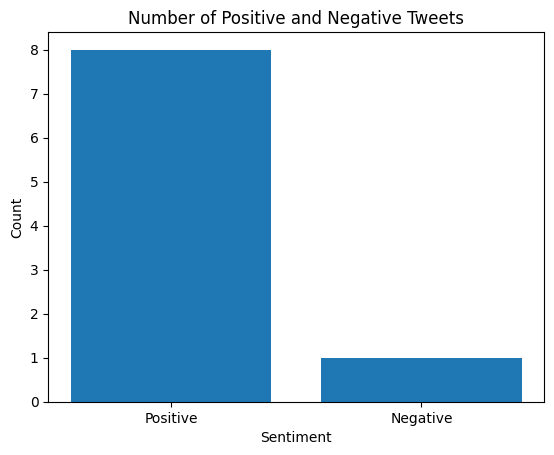

In [33]:
import matplotlib.pyplot as plt
import numpy as np

positive_count = np.count_nonzero(pred == 1)
negative_count = np.count_nonzero(pred == 0)

# Create a bar plot
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]
plt.bar(labels, counts)

# Set the plot title and labels
plt.title('Number of Positive and Negative Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the plot
plt.show()

In [34]:
dfresult=pd.DataFrame()
dfresult['Tweet']=df['text']
dfresult['Sentiment']=result

In [35]:
print(dfresult)

                                               Tweet Sentiment
0  Art is Life🔥. Just completed this\nTitle- Brot...  Negative
1  RT @BaaBaaBet: The soccer league schedule is o...  Positive
2  RT @agrayphoto: Artist Arlex Campos stands in ...  Positive
3  RT @intermiamifc0: Messi getting ready 🔥🔥 #Mes...  Positive
4  RT @intermiamifc0: Messi getting ready 🔥🔥 #Mes...  Positive
5  RT @intermiamifc0: Messi getting ready 🔥🔥 #Mes...  Positive
6  Messi Unplugged A Relaxing Retreat #short #sho...  Positive
7  RT @MaverickGems: You can stake your $BLUE tom...  Positive
8  RT @3abdu_9: When you follow your wife's decis...  Positive
